In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

Load the dataset


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Here we see there are 50000 training images and 1000 test images

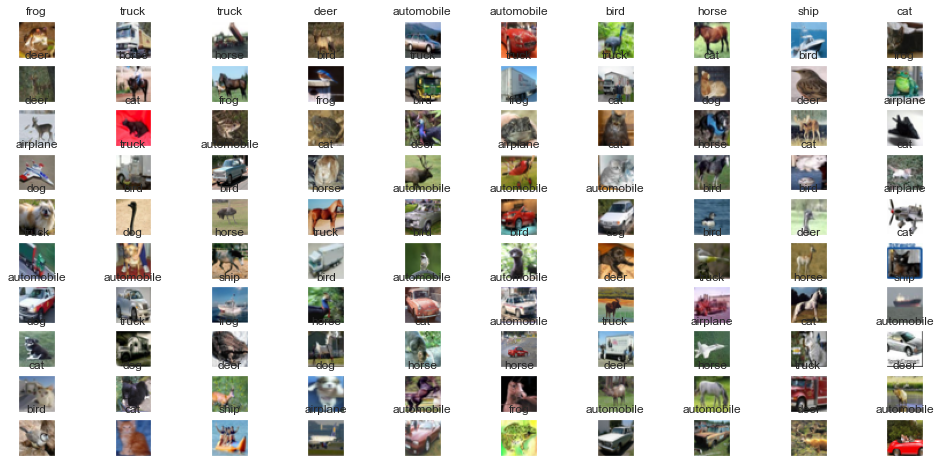

In [4]:

fig, axes = plt.subplots(ncols=10, nrows=10, figsize=(17, 8))
index = 0
for i in range(10):
    for j in range(10):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()


In [5]:
%load_ext tensorboard

In [6]:
import tensorflow as tf
import datetime, os


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

In [9]:
def train_model():

  model = create_model()
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(x=x_train, 
            y=y_train, 
            epochs=5, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback])

train_model()

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4980 - accuracy: 0.8212 - val_loss: 0.4037 - val_accuracy: 0.8531
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3857 - accuracy: 0.8607 - val_loss: 0.4000 - val_accuracy: 0.8554
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3519 - accuracy: 0.8700 - val_loss: 0.3668 - val_accuracy: 0.8649
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3297 - accuracy: 0.8771 - val_loss: 0.3506 - val_accuracy: 0.8753
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3120 - accuracy: 0.8850 - val_loss: 0.3314 - val_accuracy: 0.8783


In [10]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 11068), started 0:06:56 ago. (Use '!kill 11068' to kill it.)

In [11]:
train_model()

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4981 - accuracy: 0.8212 - val_loss: 0.4085 - val_accuracy: 0.8527
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3848 - accuracy: 0.8593 - val_loss: 0.3852 - val_accuracy: 0.8600
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3535 - accuracy: 0.8701 - val_loss: 0.3647 - val_accuracy: 0.8679
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3300 - accuracy: 0.8777 - val_loss: 0.3568 - val_accuracy: 0.8708
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3131 - accuracy: 0.8832 - val_loss: 0.3444 - val_accuracy: 0.8750
